In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv(r"C:\Users\tuvsh\OneDrive\Desktop\TU\Data Stewardship\steam.csv")


# Drop the specified columns from the DataFrame
df = df.drop(['english', 'appid', 'required_age', 'categories', 'steamspy_tags', 'achievements', 'average_playtime', 'median_playtime', 'owners', 'platforms'], axis=1)

print(df.head())

num_rows = df.shape[0]
print(f'The dataset contains {num_rows} rows.')



                        name release_date         developer publisher  genres  \
0             Counter-Strike   2000-11-01             Valve     Valve  Action   
1      Team Fortress Classic   1999-04-01             Valve     Valve  Action   
2              Day of Defeat   2003-05-01             Valve     Valve  Action   
3         Deathmatch Classic   2001-06-01             Valve     Valve  Action   
4  Half-Life: Opposing Force   1999-11-01  Gearbox Software     Valve  Action   

   positive_ratings  negative_ratings  price  
0            124534              3339   7.19  
1              3318               633   3.99  
2              3416               398   3.99  
3              1273               267   3.99  
4              5250               288   3.99  
The dataset contains 27075 rows.


In [26]:
activision_df = df.loc[df['publisher'] == "Activision"]

print(activision_df)

                                                    name release_date  \
64                  Vampire: The Masquerade - Bloodlines   2007-03-22   
65                                                  GUN™   2006-10-13   
66                                         Call of Duty®   2006-10-13   
68                        Call of Duty: United Offensive   2006-10-13   
214                         Geometry Wars: Retro Evolved   2007-06-18   
251                           Call of Duty: World at War   2008-11-18   
252                             King's Quest™ Collection   2009-07-23   
253                              Space Quest™ Collection   2009-07-23   
254                                  Aces of the Galaxy™   2009-07-23   
255                                           TimeShift™   2009-07-23   
256                        3D Ultra™ Minigolf Adventures   2009-07-23   
257                                           Prototype™   2009-06-12   
800                                         Singula

In [27]:
num_rows = activision_df.shape[0]

print(f'The dataset contains {num_rows} rows.')

The dataset contains 44 rows.


In [28]:
# Now that I have Steam games Data, I want to check, which games are the best rated ones. For this one I will use the rating system from SteamDB.
# SteamDB is a third-party website that gives better insight into the Steam platform and everything in its Database.
# After calculating the rating for the games which are published from Activision, I will check, whether the top 3 games had an impact on the Stockprice
# from Activision and see how strong their impact was. For this, I have historical data for the activision stockprices.

C:\Users\tuvsh\AppData\Local\Temp/ipykernel_19440/964949589.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activision_df['Rating'] = activision_df.apply(lambda row: GetRating(row['positive_ratings'], row['negative_ratings']), axis=1)


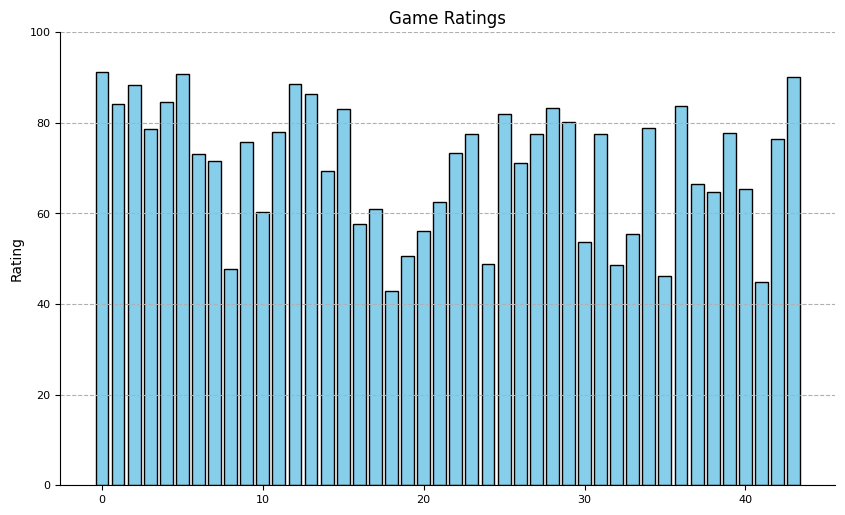

In [29]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def GetRating(positiveVotes, negativeVotes):
    totalVotes = positiveVotes + negativeVotes
    average = positiveVotes / totalVotes
    score = average - (average - 0.5) * 2 ** -math.log10(totalVotes + 1)
    return score * 100

# Calculate the rating column using apply()
activision_df['Rating'] = activision_df.apply(lambda row: GetRating(row['positive_ratings'], row['negative_ratings']), axis=1)

# Reset the index
activision_df = activision_df.reset_index(drop=True)

# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=100)

# Plot the ratings with custom styling options
plt.bar(activision_df.index, activision_df['Rating'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Rating')
plt.title('Game Ratings')

# Set the y-axis limits from 0 to 100
plt.ylim(0, 100)

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Customize tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


In [30]:
#top 3 rated games from activision
activision_df = activision_df.sort_values("Rating", ascending=False)

ATVI_top3 = activision_df.head(3)
ATVI_top3

,name,release_date,developer,publisher,genres,positive_ratings,negative_ratings,price,Rating
0,Vampire: The Masquerade - Bloodlines,2007-03-22,Troika Games,Activision,Action,6161,362,14.99,91.291094
5,Call of Duty: World at War,2008-11-18,Treyarch,Activision,Action,19595,1483,19.99,90.818877
43,Crash Bandicoot™ N. Sane Trilogy,2018-06-29,Vicarious Visions;Iron Galaxy,Activision,Action,3555,237,34.99,90.089024


In [31]:
##Getting Stockprice Data

df_stock = pd.read_csv(r"C:\Users\tuvsh\OneDrive\Desktop\TU\Data Stewardship\act_bliz.csv")

df_stock.head()

df_stock = df_stock.drop(["Open","High","Low","Volume","Currency"], axis=1)

df_stock.head(3)

,Date,Close
0,2010-01-04,11.30
1,2010-01-05,11.32
2,2010-01-06,11.26


In [32]:
%pip install yfinance

import yfinance as yf

stock_symbol = "ATVI"
start_date = "2006-01-01"
end_date = "2009-12-31"

data = yf.download(stock_symbol, start=start_date, end=end_date)
settlement_prices = data["Close"]

settlement_prices = data["Close"].to_frame().reset_index()

print(settlement_prices)



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: C:\Users\tuvsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed
           Date   Close
0    2006-01-03   6.970
1    2006-01-04   7.055
2    2006-01-05   7.115
3    2006-01-06   7.445
4    2006-01-09   7.375
...         ...     ...
1001 2009-12-23  11.360
1002 2009-12-24  11.440
1003 2009-12-28  11.380
1004 2009-12-29  11.290
1005 2009-12-30  11.390

[1006 rows x 2 columns]


In [33]:
stock_df = pd.concat([settlement_prices, df_stock])
stock_df["Date"] = pd.to_datetime(stock_df["Date"])  # Convert "Date" column to Timestamp
stock_df = stock_df.sort_values(by="Date").reset_index(drop=True)
stock_df = stock_df.rename(columns={"Close": "Settlement Price"})

stock_df

,Date,Settlement Price
0,2006-01-03,6.970
1,2006-01-04,7.055
2,2006-01-05,7.115
3,2006-01-06,7.445
4,2006-01-09,7.375
...,...,...
4192,2022-08-29,78.750
4193,2022-08-30,78.620
4194,2022-08-31,78.490
4195,2022-09-01,78.550


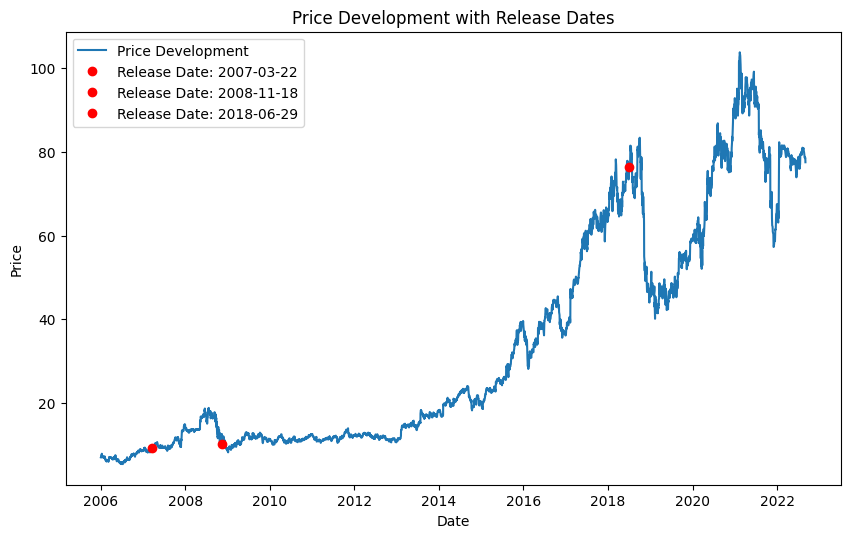

In [34]:
import matplotlib.pyplot as plt

# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=100)

# Get the unique release dates from ATVI_top3
release_dates = ATVI_top3["release_date"].unique()

# Plot the price development from stock_df
plt.plot(stock_df["Date"], stock_df["Settlement Price"], label="Price Development")

# Plot the price development for each release date
for release_date in release_dates:
    # Filter stock_df for the specific release date
    specific_prices = stock_df[stock_df["Date"] == release_date]
    # Plot the specific prices with markers
    plt.plot(specific_prices["Date"], specific_prices["Settlement Price"], 'ro', label=f"Release Date: {release_date}")

# Add labels and title to the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Development with Release Dates")
plt.legend()

# Show the plot
plt.show()


<Figure size 1400x1800 with 0 Axes>

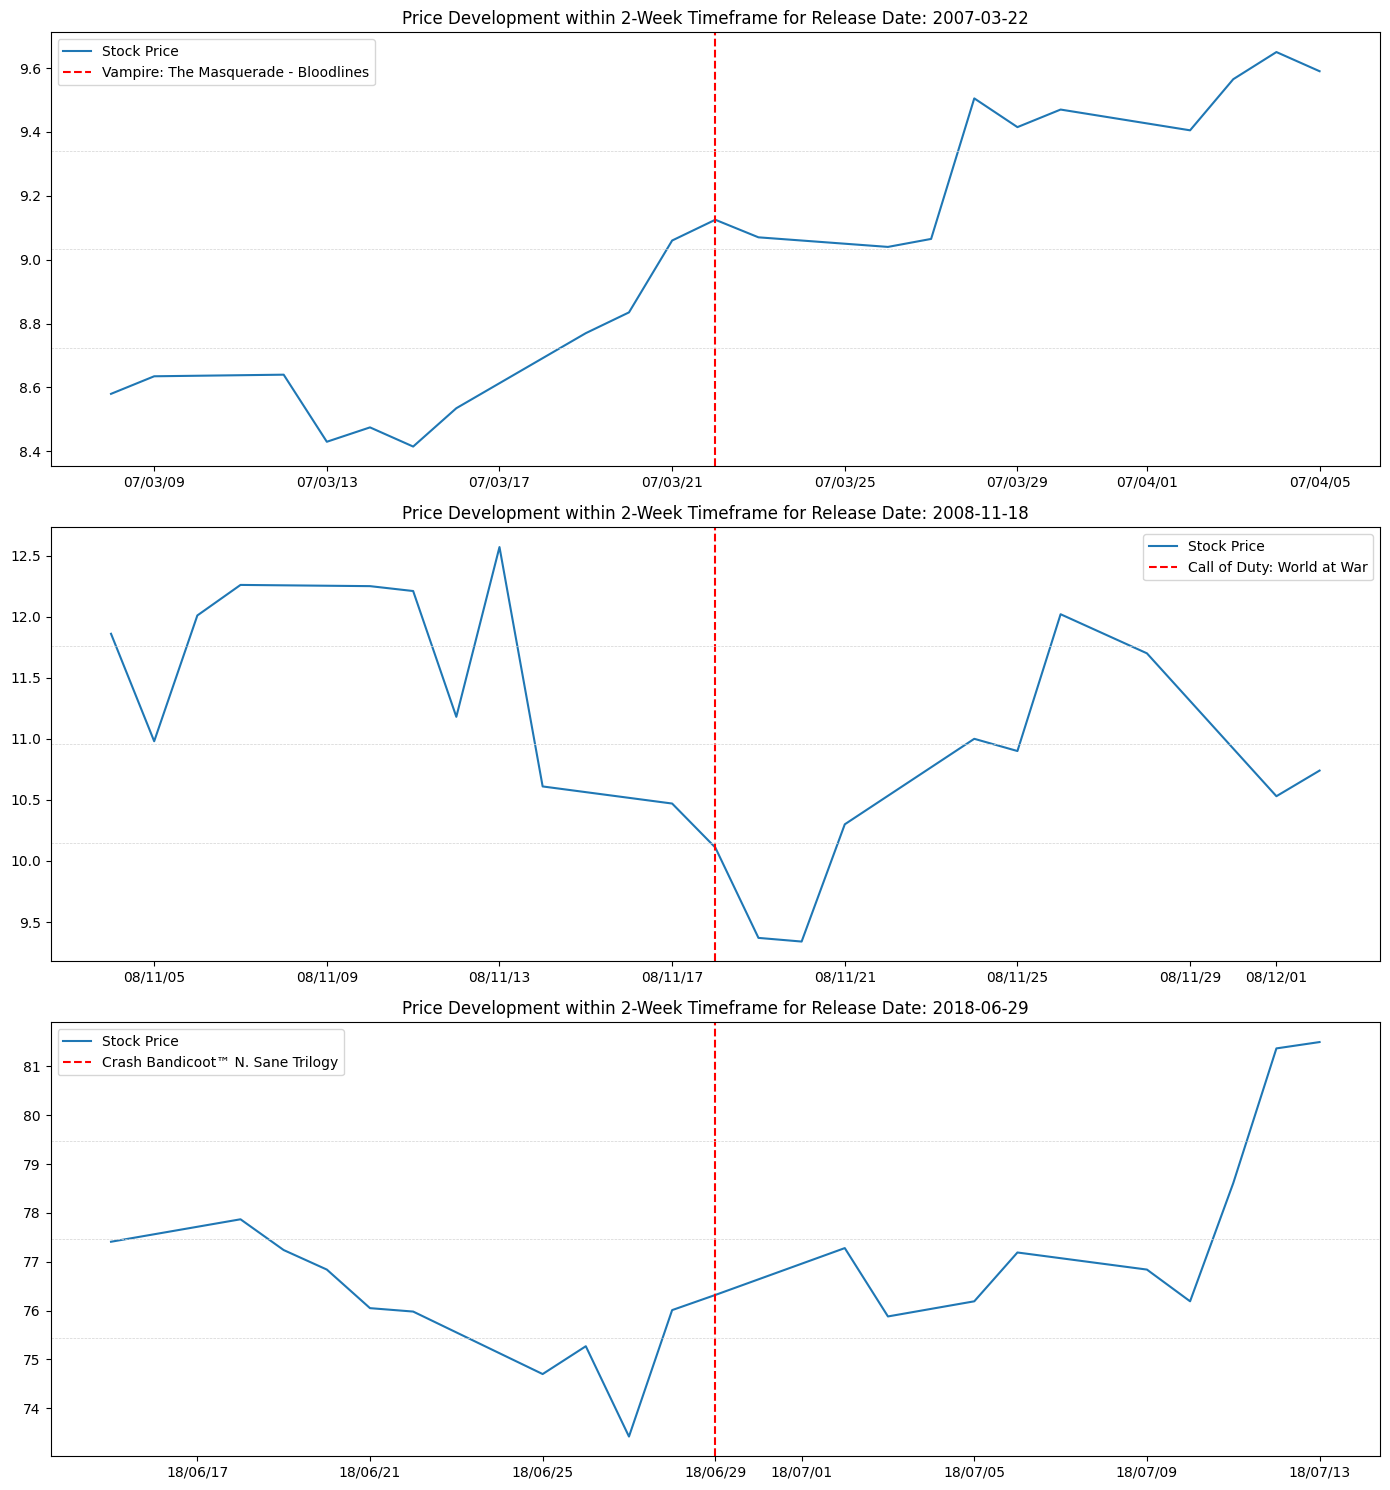

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Convert the release_date column to datetime type
ATVI_top3["release_date"] = pd.to_datetime(ATVI_top3["release_date"], errors='coerce')

# Remove rows with invalid release dates
ATVI_top3 = ATVI_top3.dropna(subset=["release_date"])

# Set the figure size and DPI
plt.figure(figsize=(14, 18), dpi=100)  # Adjust the figure size as needed

# Get the unique release dates and game names from ATVI_top3
release_dates = ATVI_top3["release_date"].unique()
game_names = ATVI_top3["name"].unique()

# Define the 2-week timeframe
timeframe = np.timedelta64(14, 'D')

# Calculate the number of rows and columns for subplots
num_plots = len(release_dates)
num_cols = 1
num_rows = num_plots // num_cols

# Create subplots with appropriate spacing
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, num_plots*5), dpi=100)
plt.subplots_adjust(hspace=0.5)

# Plot the price development for each release date
for i, release_date in enumerate(release_dates):
    # Get the start and end dates for the 2-week timeframe
    start_date = release_date - timeframe
    end_date = release_date + timeframe
    
    # Filter stock_df within the 2-week timeframe
    prices_within_timeframe = stock_df[(stock_df["Date"] >= start_date) & (stock_df["Date"] <= end_date)]
    
    # Select the appropriate subplot
    if num_plots > 1:
        ax = axs[i]
    else:
        ax = axs
    
    # Plot the price development within the 2-week timeframe
    ax.plot(prices_within_timeframe["Date"], prices_within_timeframe["Settlement Price"], label="Stock Price")
    
    # Add a red line to mark the release date
    ax.axvline(x=release_date, color='red', linestyle='--')
    
    # Add parallel lines for better visual clarity
    min_price = prices_within_timeframe["Settlement Price"].min()
    max_price = prices_within_timeframe["Settlement Price"].max()
    price_range = max_price - min_price
    line1 = min_price + 0.25 * price_range
    line2 = min_price + 0.5 * price_range
    line3 = min_price + 0.75 * price_range
    ax.axhline(y=line1, color='lightgray', linestyle='--', linewidth=0.5)
    ax.axhline(y=line2, color='lightgray', linestyle='--', linewidth=0.5)
    ax.axhline(y=line3, color='lightgray', linestyle='--', linewidth=0.5)
    
    # Get the game name for the current release date
    game_name = ATVI_top3.loc[ATVI_top3["release_date"] == release_date, "name"].values[0]
    
    # Add the game name as a legend
    ax.legend(["Stock Price", game_name])

    # Convert release_date to numpy.datetime64 object
    release_date = np.datetime64(release_date)

    # Format the title with the release date in yy/mm/dd format
    formatted_date = np.datetime_as_string(release_date, unit='D')
    ax.set_title(f"Price Development within 2-Week Timeframe for Release Date: {formatted_date}")





    # Set the x-axis tick locator and formatter
    # Set the x-axis tick locator and formatter
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y/%m/%d"))

# Display the plots
plt.tight_layout()
plt.show()


